Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Company_Data.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])

In [11]:
le=LabelEncoder()
df["Urban"]=le.fit_transform(df["Urban"])

In [12]:
le=LabelEncoder()
df["US"]=le.fit_transform(df["US"])

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [14]:
df["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
array=df.values
array

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  ,   1.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  ,   1.  ,   1.  ]])

In [17]:
X=array[:,2:]
y=array[:,1]


In [18]:
X

array([[ 73.,  11., 276., ...,  17.,   1.,   1.],
       [ 48.,  16., 260., ...,  10.,   1.,   1.],
       [ 35.,  10., 269., ...,  12.,   1.,   1.],
       ...,
       [ 26.,  12., 368., ...,  18.,   1.,   1.],
       [ 79.,   7., 284., ...,  12.,   1.,   1.],
       [ 37.,   0.,  27., ...,  16.,   1.,   1.]])

In [19]:
y

array([138., 111., 113., 117., 141., 124., 115., 136., 132., 132., 121.,
       117., 122., 115., 107., 149., 118., 147., 110., 129., 125., 134.,
       128., 121., 145., 139., 107.,  98., 103., 104., 125., 136., 107.,
       114., 115., 131., 122., 121., 109., 130., 119., 157.,  77., 123.,
        85., 141., 127., 126., 116., 157.,  99., 121., 153., 109., 134.,
       143., 133.,  93., 103., 118., 122., 105., 139., 119., 100., 122.,
       127., 126., 149., 127.,  89., 148., 115., 118., 150.,  88., 102.,
       118., 134., 134., 113., 116., 151., 109., 111., 125., 150., 131.,
       117., 128., 115.,  97., 114., 145., 115., 134., 147., 161., 122.,
       121., 113., 128., 113., 123., 121., 104., 102., 134., 107., 115.,
       128., 132., 116., 131., 122., 139., 135., 145., 112., 130., 128.,
       125., 119., 127., 131.,  89., 153., 125., 133., 143.,  94., 108.,
       125., 132., 132.,  96., 131., 128., 125., 146., 133., 140., 124.,
       122., 132., 144., 114., 140., 110., 121., 12

In [21]:
num_trees=200
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_depth=5,min_samples_leaf=5,max_features='sqrt')
results=cross_val_score(model,X,y,cv=kfold)
results

array([0.05  , 0.025 , 0.05  , 0.0125, 0.025 ])

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
rf=RandomForestClassifier(random_state=25,n_jobs=-1)
rf

RandomForestClassifier(n_jobs=-1, random_state=25)

In [24]:
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}

In [25]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(X,y)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [26]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.05499999999999999


In [27]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=25)

In [28]:
model.fit(X,y)
model.feature_importances_

array([0.16607601, 0.1036355 , 0.17413095, 0.21409951, 0.05229982,
       0.15563813, 0.08762291, 0.02571516, 0.02078199])

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [30]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=5,random_state=5)
results=cross_val_score(model,X,y,cv=kfold)

In [31]:
results.mean()

0.017499999999999998

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [34]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
estimators=[]
model1=LogisticRegression(max_iter=20)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('decision_tree',model2))
model3=SVC()
estimators.append(('svm',model3))

In [35]:
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, X, y, cv=kfold)

In [36]:
results_voting

array([0.025, 0.   , 0.075, 0.025, 0.   , 0.025, 0.   , 0.   , 0.025,
       0.05 ])

In [37]:
results_voting.mean()

0.0225

In [38]:
stack = StackingClassifier(estimators)
results_stacking = cross_val_score(stack, X, y, cv=kfold)

In [39]:
results_stacking.mean()

0.0

In [40]:
results_stacking

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

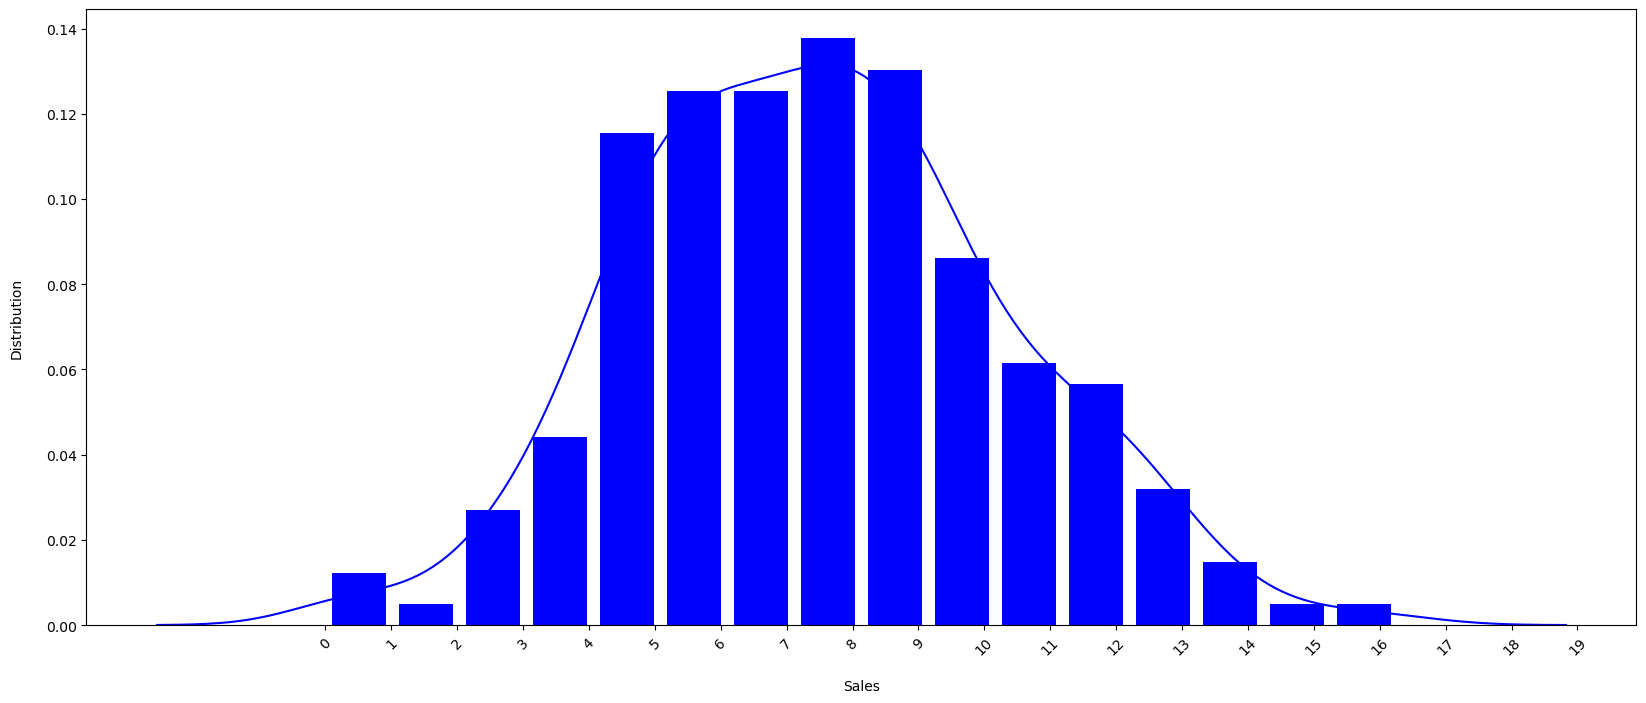

In [42]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")